In [22]:
import pandas as pd

## Pre-Processing

In [23]:
# Importing historical Tesla Data
tesla_historical_DF = pd.read_csv('TSLA_historical.csv')

# Importing Crude Oil Data
crudeOilDf = pd.read_csv('Crude_oil_historical.csv')

# Adding closing price for crude oil in Tesla main Dataset
tesla_historical_DF = pd.merge(tesla_historical_DF, crudeOilDf[['Date', 'Close']], on='Date', how='left')
tesla_historical_DF.rename(columns={'Close': 'Crude_Oil'}, inplace=True)

# Adding DJI close value to Dataset
DJIHistoricalDf = pd.read_csv('DJI_historical.csv')
DJIHistoricalDf['Date'] = pd.to_datetime(DJIHistoricalDf['Date'])
DJIHistoricalDf['Date'] = DJIHistoricalDf['Date'].dt.strftime('%d/%m/%Y')

tesla_historical_DF = pd.merge(tesla_historical_DF, DJIHistoricalDf[['Date', 'Close']], on='Date', how='left')
tesla_historical_DF.rename(columns={'Close': 'DJI'}, inplace=True)

# adding gold closing price to dataset
goldHistoricalDf = pd.read_csv('gold_historical.csv')
goldHistoricalDf['Date'] = pd.to_datetime(DJIHistoricalDf['Date'])
goldHistoricalDf['Date'] = goldHistoricalDf['Date'].dt.strftime('%d/%m/%Y')

tesla_historical_DF = pd.merge(tesla_historical_DF, goldHistoricalDf[['Date', 'Close']], on='Date', how='left')
tesla_historical_DF.rename(columns={'Close': 'Gold'}, inplace=True)

# Adding closing price of silver to dataset
silverHistoricalDf = pd.read_csv('silver_historical.csv')
silverHistoricalDf['Date'] = pd.to_datetime(DJIHistoricalDf['Date'])
silverHistoricalDf['Date'] = silverHistoricalDf['Date'].dt.strftime('%d/%m/%Y')

tesla_historical_DF = pd.merge(tesla_historical_DF, silverHistoricalDf[['Date', 'Close']], on='Date', how='left')
tesla_historical_DF.rename(columns={'Close': 'Silver'}, inplace=True)

# adding nasdaq closing price to dataset
NasdaqHistoricalDf = pd.read_csv('Nasdaq_historical.csv')
NasdaqHistoricalDf['Date'] = pd.to_datetime(DJIHistoricalDf['Date'])
NasdaqHistoricalDf['Date'] = NasdaqHistoricalDf['Date'].dt.strftime('%d/%m/%Y')

tesla_historical_DF = pd.merge(tesla_historical_DF, NasdaqHistoricalDf[['Date', 'Close']], on='Date', how='left')
tesla_historical_DF.rename(columns={'Close': 'Nasdaq'}, inplace=True)

# Adding S&P100 closing price to dataset 
SPHistoricalDf = pd.read_csv('S&P_historical.csv')
SPHistoricalDf['Date'] = pd.to_datetime(DJIHistoricalDf['Date'])
SPHistoricalDf['Date'] = SPHistoricalDf['Date'].dt.strftime('%d/%m/%Y')

tesla_historical_DF = pd.merge(tesla_historical_DF, SPHistoricalDf[['Date', 'Close']], on='Date', how='left')
tesla_historical_DF.rename(columns={'Close': 'S&P'}, inplace=True)

print(tesla_historical_DF.head(10))

         Date  TSLA_Open  TSLA_High   TSLA_Low  TSLA_Close  TSLA_Adj Close  \
0  19/10/2018  17.826000  17.977333  16.900000   17.333332       17.333332   
1  22/10/2018  17.378668  17.457333  16.839333   17.396667       17.396667   
2  23/10/2018  17.591333  19.862000  17.473333   19.609333       19.609333   
3  24/10/2018  20.070000  20.296000  19.048668   19.233334       19.233334   
4  25/10/2018  21.148001  21.400000  20.067333   20.990667       20.990667   
5  26/10/2018  20.549999  22.660000  20.443333   22.059999       22.059999   
6  29/10/2018  22.497999  23.143999  21.766666   22.323334       22.323334   
7  30/10/2018  21.892668  22.526667  21.483999   21.993334       21.993334   
8  31/10/2018  22.169333  22.799999  21.940001   22.488001       22.488001   
9  01/11/2018  22.550667  23.189333  22.315332   22.952000       22.952000   

   TSLA_Volume  Crude_Oil           DJI         Gold  Silver       Nasdaq  \
0    140632500        NaN           NaN          NaN     NaN    

C:\Users\New Gen Laptop\AppData\Local\Temp\ipykernel_16644\4143227216.py:21: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  goldHistoricalDf['Date'] = pd.to_datetime(DJIHistoricalDf['Date'])
C:\Users\New Gen Laptop\AppData\Local\Temp\ipykernel_16644\4143227216.py:29: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  silverHistoricalDf['Date'] = pd.to_datetime(DJIHistoricalDf['Date'])
C:\Users\New Gen Laptop\AppData\Local\Temp\ipykernel_16644\4143227216.py:37: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  NasdaqHistoricalDf['Date'] = pd.to_datetime(DJIHistoricalDf['Date'])
C:\Users\New Gen Laptop\AppData\Local\Temp\ipykernel_16644\4143227216.py:45

## Other company Data

In [24]:
# Reload the cash flow dataframe to ensure it's in its original state
tesla_cash_flow_DF = pd.read_csv('TSLA_cash_flow.csv')
tesla_income_statement_DF = pd.read_csv('TSLA_income_statement.csv')
tesla_balance_sheet_DF = pd.read_csv('TSLA_balance_sheet.csv')
# Assuming tesla_historical_DF and tesla_cash_flow_DF are already loaded
# Convert 'Date' in tesla_historical_DF to datetime
tesla_historical_DF['Date'] = pd.to_datetime(tesla_historical_DF['Date'], format='%d/%m/%Y')

# Loop through each date and corresponding cash flow value in tesla_cash_flow_DF
# Skip non-date entries like 'ttm'
for column in tesla_cash_flow_DF.columns[1:]:  # Start from the second column to avoid 'Breakdown'
    if column.lower() != 'ttm':  # Skip 'ttm'
        date = pd.to_datetime(column, format='%m/%d/%Y')
        cash_flow_str = tesla_cash_flow_DF[column][0]  # Assuming the cash flow value is in the first row and in string format
        cash_flow = float(cash_flow_str.replace(',', ''))  # Remove commas and convert to float
        tesla_historical_DF.loc[tesla_historical_DF['Date'] < date, 'operating_cash_flow'] = cash_flow

for column in tesla_income_statement_DF.columns[1:]:  # Start from the second column to avoid 'Breakdown'
    if column.lower() != 'ttm':  # Skip 'ttm'
        date = pd.to_datetime(column, format='%m/%d/%Y')
        total_revenue_str = tesla_income_statement_DF[column][0] 
        total_revenue = float(total_revenue_str.replace(',', ''))
        tesla_historical_DF.loc[tesla_historical_DF['Date'] < date, 'total_revenue'] = total_revenue

for column in tesla_balance_sheet_DF.columns[1:]:  # Start from the second column to avoid 'Breakdown'
    if column.lower() != 'ttm':  # Skip 'ttm'
        date = pd.to_datetime(column, format='%m/%d/%Y')
        current_assets_str = tesla_balance_sheet_DF[column][1] 
        current_assets = float(current_assets_str.replace(',', ''))  
        current_liabilities_str = tesla_balance_sheet_DF[column][30] 
        current_liabilities = float(current_liabilities_str.replace(',', ''))  
        tesla_historical_DF.loc[tesla_historical_DF['Date'] < date, 'current_assets'] = current_assets
        tesla_historical_DF.loc[tesla_historical_DF['Date'] < date, 'current_liabilities'] = current_liabilities


# Convert 'Date' back to the desired format

# Display the first few rows of the modified dataframe
print(tesla_historical_DF.head())


        Date  TSLA_Open  TSLA_High   TSLA_Low  TSLA_Close  TSLA_Adj Close  \
0 2018-10-19  17.826000  17.977333  16.900000   17.333332       17.333332   
1 2018-10-22  17.378668  17.457333  16.839333   17.396667       17.396667   
2 2018-10-23  17.591333  19.862000  17.473333   19.609333       19.609333   
3 2018-10-24  20.070000  20.296000  19.048668   19.233334       19.233334   
4 2018-10-25  21.148001  21.400000  20.067333   20.990667       20.990667   

   TSLA_Volume  Crude_Oil           DJI         Gold  Silver       Nasdaq  \
0    140632500        NaN           NaN          NaN     NaN          NaN   
1     84004500  69.169998  25317.410156  1221.199951  14.522  7468.629883   
2    285417000  66.430000  25191.429688  1233.400024  14.728  7437.540039   
3    300874500  66.820000  24583.419922  1227.800049  14.611  7108.399902   
4    312610500  67.330002  24984.550781  1229.099976  14.565  7318.339844   

           S&P  operating_cash_flow  total_revenue  current_assets  \
0   

In [25]:
tesla_historical_DF.to_csv("test.csv", index=False)


In [26]:
tesla_historical_DF = tesla_historical_DF.dropna()
print(tesla_historical_DF)


           Date   TSLA_Open   TSLA_High    TSLA_Low  TSLA_Close  \
1    2018-10-22   17.378668   17.457333   16.839333   17.396667   
2    2018-10-23   17.591333   19.862000   17.473333   19.609333   
3    2018-10-24   20.070000   20.296000   19.048668   19.233334   
4    2018-10-25   21.148001   21.400000   20.067333   20.990667   
5    2018-10-26   20.549999   22.660000   20.443333   22.059999   
...         ...         ...         ...         ...         ...   
1051 2022-12-22  136.000000  136.630005  122.260002  125.349998   
1052 2022-12-23  126.370003  128.619995  121.019997  123.150002   
1053 2022-12-27  117.500000  119.669998  108.760002  109.099998   
1054 2022-12-28  110.349998  116.269997  108.239998  112.709999   
1055 2022-12-29  120.389999  123.570000  117.500000  121.820000   

      TSLA_Adj Close  TSLA_Volume  Crude_Oil           DJI         Gold  \
1          17.396667     84004500  69.169998  25317.410156  1221.199951   
2          19.609333    285417000  66.430000 

In [27]:
tesla_historical_DF.size

17935

In [28]:

cols = list(tesla_historical_DF.columns)
cols.insert(len(cols), cols.pop(cols.index('TSLA_Close')))
tesla_historical_DF = tesla_historical_DF.loc[:, cols]
print(tesla_historical_DF)

           Date   TSLA_Open   TSLA_High    TSLA_Low  TSLA_Adj Close  \
1    2018-10-22   17.378668   17.457333   16.839333       17.396667   
2    2018-10-23   17.591333   19.862000   17.473333       19.609333   
3    2018-10-24   20.070000   20.296000   19.048668       19.233334   
4    2018-10-25   21.148001   21.400000   20.067333       20.990667   
5    2018-10-26   20.549999   22.660000   20.443333       22.059999   
...         ...         ...         ...         ...             ...   
1051 2022-12-22  136.000000  136.630005  122.260002      125.349998   
1052 2022-12-23  126.370003  128.619995  121.019997      123.150002   
1053 2022-12-27  117.500000  119.669998  108.760002      109.099998   
1054 2022-12-28  110.349998  116.269997  108.239998      112.709999   
1055 2022-12-29  120.389999  123.570000  117.500000      121.820000   

      TSLA_Volume  Crude_Oil           DJI         Gold     Silver  \
1        84004500  69.169998  25317.410156  1221.199951  14.522000   
2      

In [29]:
tesla_historical_DF.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1055 entries, 1 to 1055
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 1055 non-null   datetime64[ns]
 1   TSLA_Open            1055 non-null   float64       
 2   TSLA_High            1055 non-null   float64       
 3   TSLA_Low             1055 non-null   float64       
 4   TSLA_Adj Close       1055 non-null   float64       
 5   TSLA_Volume          1055 non-null   int64         
 6   Crude_Oil            1055 non-null   float64       
 7   DJI                  1055 non-null   float64       
 8   Gold                 1055 non-null   float64       
 9   Silver               1055 non-null   float64       
 10  Nasdaq               1055 non-null   float64       
 11  S&P                  1055 non-null   float64       
 12  operating_cash_flow  1055 non-null   float64       
 13  total_revenue        1055 non-null   f

In [30]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.utils import to_categorical
import numpy as np


In [31]:
# Select relevant feature columns and scale the features
# tesla_historical_DF['Date'] = pd.to_datetime(tesla_historical_DF['Date'])

# # Create new features for year, month, day, and day of week
# tesla_historical_DF['Year'] = tesla_historical_DF['Date'].dt.year
# tesla_historical_DF['Month'] = tesla_historical_DF['Date'].dt.month
# tesla_historical_DF['Day'] = tesla_historical_DF['Date'].dt.day
# tesla_historical_DF['DayOfWeek'] = tesla_historical_DF['Date'].dt.dayofweek

# # Drop the original 'Date' column
# tesla_historical_DF = tesla_historical_DF.drop(['Date'], axis=1)

In [32]:
# 
scaler = MinMaxScaler(feature_range=(0, 1))
# Now, you can include 'Year', 'Month', 'Day', and 'DayOfWeek' in your feature_columns
feature_columns = ['TSLA_Open', 'TSLA_High', 'TSLA_Low', 'TSLA_Adj Close',
       'TSLA_Volume', 'Crude_Oil', 'DJI', 'Gold', 'Silver', 'Nasdaq', 'S&P', 'operating_cash_flow', 'total_revenue', 'current_assets', 'current_liabilities']
# feature_columns = ['TSLA_Open', 'TSLA_High', 'TSLA_Low', 'TSLA_Adj Close',
       # 'TSLA_Volume']
X = tesla_historical_DF[feature_columns].values
# Scale the features
X = scaler.fit_transform(X)

# Scale the target variable
y = tesla_historical_DF['TSLA_Close'].values.reshape(-1, 1)  # Reshape for scaling
y = scaler.fit_transform(y)

In [33]:
window_size = 10

def create_dataset(X, y, window_size=1):
    data_X, data_y = [], []
    for i in range(len(X) - window_size - 1):
        data_X.append(X[i:(i + window_size), :])
        data_y.append(y[i + window_size])
    return np.array(data_X), np.array(data_y)

X, y = create_dataset(X, y, window_size)

### Split the data into training and testing sets:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)


In [34]:
X_train

array([[[0.01328337, 0.01246607, 0.01279619, ..., 0.        ,
         0.        , 0.        ],
        [0.01381584, 0.01844706, 0.01440587, ..., 0.        ,
         0.        , 0.        ],
        [0.02002187, 0.01952653, 0.01840553, ..., 0.        ,
         0.        , 0.        ],
        ...,
        [0.02527813, 0.02575459, 0.02574641, ..., 0.        ,
         0.        , 0.        ],
        [0.0262329 , 0.02672296, 0.02669934, ..., 0.        ,
         0.        , 0.        ],
        [0.02714762, 0.02694847, 0.02774538, ..., 0.        ,
         0.        , 0.        ]],

       [[0.01381584, 0.01844706, 0.01440587, ..., 0.        ,
         0.        , 0.        ],
        [0.02002187, 0.01952653, 0.01840553, ..., 0.        ,
         0.        , 0.        ],
        [0.02272094, 0.02227245, 0.02099184, ..., 0.        ,
         0.        , 0.        ],
        ...,
        [0.0262329 , 0.02672296, 0.02669934, ..., 0.        ,
         0.        , 0.        ],
        [0.0

In [35]:
model = Sequential()
model.add(LSTM(500, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True))
model.add(Dropout(0.2))  # Optional: Dropout for regularization

# Additional LSTM layer
model.add(LSTM(250, return_sequences=True))
model.add(Dropout(0.2))  # Optional: Dropout for regularization

# Maybe another LSTM layer
model.add(LSTM(100))

# Final Dense layer for output
model.add(Dense(1, activation='linear'))

# Train the LSTM model
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae'])

history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.1, verbose=1, shuffle=False)


Epoch 1/100
24/24 [==============================] - 16s 248ms/step - loss: 0.0100 - mae: 0.0714 - val_loss: 0.0321 - val_mae: 0.1515
Epoch 2/100
24/24 [==============================] - 3s 124ms/step - loss: 0.0156 - mae: 0.1051 - val_loss: 0.0322 - val_mae: 0.1578
Epoch 3/100
24/24 [==============================] - 3s 133ms/step - loss: 0.0084 - mae: 0.0767 - val_loss: 0.0542 - val_mae: 0.2067
Epoch 4/100
24/24 [==============================] - 5s 187ms/step - loss: 0.0243 - mae: 0.1299 - val_loss: 0.0139 - val_mae: 0.0985
Epoch 5/100
24/24 [==============================] - 3s 141ms/step - loss: 0.0241 - mae: 0.1224 - val_loss: 0.0541 - val_mae: 0.2152
Epoch 6/100
24/24 [==============================] - 3s 135ms/step - loss: 0.0048 - mae: 0.0593 - val_loss: 0.0095 - val_mae: 0.0697
Epoch 7/100
24/24 [==============================] - 4s 164ms/step - loss: 0.0055 - mae: 0.0549 - val_loss: 0.0140 - val_mae: 0.0965
Epoch 8/100
24/24 [==============================] - 5s 198ms/step -

In [36]:
# Evaluate the model
loss, mae = model.evaluate(X_test, y_test, verbose=1)
print("Test MAE: {:.4f}".format(mae))

# Optionally, you can calculate and print MSE or RMSE
from sklearn.metrics import mean_squared_error
from math import sqrt

# Make predictions
y_pred = model.predict(X_test)

# Inverse transform the predictions and actual values to get the original scale
y_pred_inverse = scaler.inverse_transform(y_pred)
y_test_inverse = scaler.inverse_transform(y_test)

# Calculate MSE and RMSE
mse = mean_squared_error(y_test_inverse, y_pred_inverse)
rmse = sqrt(mse)

print("Test MSE: {:.4f}".format(mse))
print("Test RMSE: {:.4f}".format(rmse))


7/7 [==============================] - 0s 35ms/step - loss: 0.0134 - mae: 0.1007
Test MAE: 0.1007
7/7 [==============================] - 4s 29ms/step
Test MSE: 2118.4958
Test RMSE: 46.0271


## testing


In [37]:

# Number of features (excluding date columns)
num_features = len(feature_columns)  # Adjust this if necessary

# Define a generic range for random values for each feature
# This is a very basic approach; in a real scenario, you might want to use more specific ranges
min_value = 0
max_value = 1000

# Generate random data for a single prediction with a window size of 25
window_size_for_prediction = 10
random_data = np.random.uniform(low=min_value, high=max_value, size=(window_size_for_prediction, num_features))


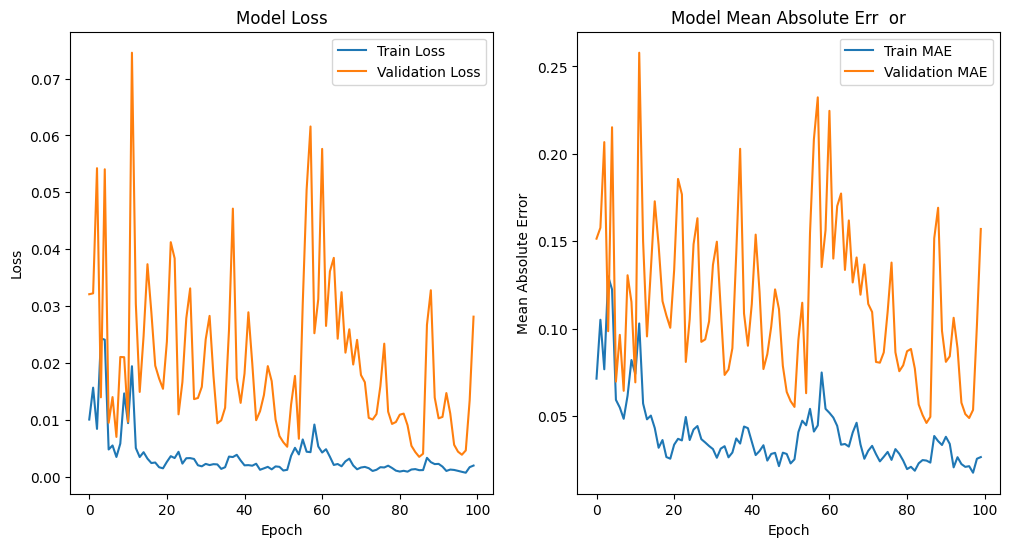

In [38]:
import matplotlib.pyplot as plt

# Assuming 'history' is the object returned by model.fit

# Plotting the Loss Curve
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')

# Plotting the Accuracy Curve (MAE)
plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Model Mean Absolute Err  or')
plt.ylabel('Mean Absolute Error')
plt.xlabel('Epoch')
plt.legend(loc='upper right')

plt.show()

In [39]:
print(random_data)

[[531.12551991 938.00547581 486.8901439  980.54319921 854.84225997
  109.41261577 167.44378637  91.68199303 908.64891824 952.88739321
  476.87606435 215.00085875 905.58118695 598.42005451 166.48087457]
 [457.45642355   2.96024241   2.23006294 691.94612542 924.19925649
  559.15828676  77.00612432 464.32947199 559.38997334 887.25440537
  721.19331772 540.74475533 778.18328434 638.34021107 897.90306213]
 [984.2532628   21.58487557 145.56157044 784.37046891 250.91466766
  516.57766937 347.16469345 194.14149938 681.86236861 345.57543754
  702.80064334 817.51259039 380.99422447 747.94514255 702.41317088]
 [202.83592158 164.55067941 695.44045982 435.1860039  343.8687411
  874.61568163 314.26697444 360.6440729   67.04079994 526.327435
  716.97541626 372.49134503 684.4237749  805.1262571   32.91371071]
 [420.18933669 621.59515792 694.03060238 596.63728784  43.32228167
  988.03111324 497.2318878  260.40643634 120.17519927 304.55548776
  290.28162165 511.75859511 915.56257742 619.60856995 794.480

In [40]:
# Scalers for features and target
feature_scaler = MinMaxScaler(feature_range=(0, 1))
target_scaler = MinMaxScaler(feature_range=(0, 1))

# Scale the features and target
X_scaled = feature_scaler.fit_transform(tesla_historical_DF[feature_columns].values)
y = tesla_historical_DF['TSLA_Close'].values.reshape(-1, 1)
y_scaled = target_scaler.fit_transform(y)

# Create dataset for LSTM
X_reshaped, y_reshaped = create_dataset(X_scaled, y_scaled, window_size)

scaled_random_data = feature_scaler.transform(random_data)  # Use feature_scaler here

# Reshape the random data for prediction
random_data_reshaped = np.reshape(scaled_random_data, (1, window_size_for_prediction, len(feature_columns)))

# Make a prediction
predicted_value = model.predict(random_data_reshaped)

# Inverse transform the predicted value using the target scaler
predicted_value_actual = target_scaler.inverse_transform(predicted_value)

print("Predicted Value:", predicted_value_actual)


1/1 [==============================] - 0s 63ms/step
Predicted Value: [[184.57208]]


In [41]:
tesla_historical_DF.to_csv("Second Trained.csv", index=False)